## 实现简单线性回归法 

In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [85]:
x = np.array([1., 2., 3., 4., 5.])    #float
y = np.array([1., 3., 2., 3., 5.]) 

[0, 6, 0, 6]

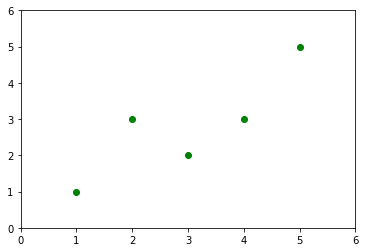

In [86]:
# first plot scatter 得有一定linear relation 
plt.scatter(x, y, color = 'g') 
plt.axis([0, 6, 0, 6])

In [87]:
# get mean 
x_mean = np.mean(x) 
y_mean = np.mean(y)
# vectorized computation 
# dot product here doesn't matter,cuz x here is a vector not matrix 
# later in function we need to use dot product 
# this is element wise:  numerator = np.sum((x-x_mean)*(y-y_mean))
numerator = np.sum((x-x_mean).dot(y-y_mean))
denominator = np.sum((x-x_mean).dot(x-x_mean))
a = numerator/denominator 

In [88]:
b = y_mean - a * x_mean
b

0.39999999999999947

In [89]:
print(f'a = {a}, b = {b}')

a = 0.8, b = 0.39999999999999947


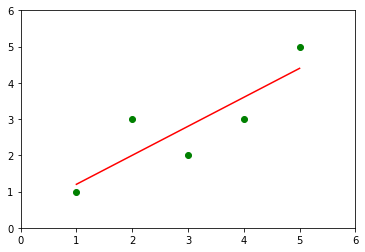

In [90]:
# now we have a and b , plot linear best fit 
plt.scatter(x, y, color = 'g') 
plt.axis([0, 6, 0, 6])
plt.plot(x, a*x + b, color = 'r')

# all plot on plt (name of the graph)

In [91]:
# predict 
x_predict = 6
y_predict = a * x_predict + b
y_predict

5.2

In [92]:
class Myclass: 
    def __init__(self): 
        ''' 
        this instantiation process creates objects with instances 
        customized to a specific initial state 
        '''
        self.data = [] 
# so a new initialized instance is x = Myclass() 
x = Myclass()
x

In [93]:
class Myclass: 
    def __init__(self, a, b): 
        ''' 
        this instantiation process creates objects with instances 
        customized to a specific initial state 
        '''
        self._r = a 
        self._i = b 
# so a new initialized instance is x = Myclass(2,3)
x = Myclass(2,3)    #  x type is MyClass 
x._r 
x._i
print(type(x))

<class '__main__.Myclass'>


In [94]:
class Dog:

    kind = 'canine'         # class variable shared by all instances

    def __init__(self, name):
        self.name = name    # instance variable unique to each instance

d = Dog('Fido')    
e = Dog('Mao')
d.kind  # gives 'canine'
e.kind   # gives 'canine'
d.name #diff from e.name 

'Fido'

## 封装自己的simple linear regression (SLR) 

In [95]:
class SimLinear: 
    def __init__(self):
        '''
        初始化 Simple linear regression model
        '''
        self._a = None 
        self._b = None 
        
    def fit(self, x_train, y_train): 
        '''
        Simple linear regression 
        training parameters
        :param x_train: training matrix x 
        :param y_train: training x corresponding 的y 
        :return: machine learning self 
        '''
        """根据训练数据集x_train,y_train训练Simple Linear Regression模型"""
        assert x_train.ndim == 1, \
            "Simple Linear Regressor can only solve single feature training data."
        assert len(x_train) == len(y_train), \
            "the size of x_train must be equal to the size of y_train"
        # calculate mean 
        x_mean = np.mean(x_train) 
        y_mean = np.mean(y_train)
        # vectorized computation to get parameters 
        # note!!! 
        # dot product!!! 
        # if use (...)*(...) this is element-wise multiplication
        numerator = np.sum((x_train-x_mean).dot(y_train-y_mean))
        #denominator = np.sum((x_train-x_mean)**2)
        denominator = np.sum((x_train-x_mean).dot(x_train-x_mean))
        self._a = numerator/denominator y
        # self._a is scalar 
        self._b = y_mean - self._a * x_mean 
        # does not return anything 
        
    def predict(self, x_test): 
        '''
        function: 
        return the predicted y value 
        :param x_test: test x dataset 
        :return: return predicted dataset in a numpy.array
        '''
        res = np.array([self.mysingle(i) for i in x_test]) 
        return res 
    
    def mysingle(self, x): 
        '''
        给定单个待预测数据x_single，返回x_single对应的预测结果值
        '''
        # self._a is scalar, so we can use multiply 
        return self._a * x + self._b
    
    def mse(predict_y, y_test): 
        return (np.sum(( y_test - predict_y)**2))/len(y_test)
    def rmse(predict_y, y_test): 
        return np.sqrt ((np.sum((y_test - predict_y)**2))/len(y_test))
    def mae(predict_y, y_test): 
        return (np.sum(np.absolute(y_test - predict_y)))/len(y_test)

In [96]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [97]:
y = np.arange(5).reshape(5,-1)
y

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [98]:
x.dot(y)

array([30])

In [99]:
x*y

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [100]:
if __name__ == '__main__': 
    x = np.array([1., 2., 3., 4., 5.])    #float
    y = np.array([1., 3., 2., 3., 5.]) 
    # initialize 
    ln = SimLinear() 
    # fit with x and y 
    ln.fit(x, y) 
    res = ln.predict([6])
    print(res)

[5.2]


## Boston price case 

In [101]:
import numpy as np 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
from statsmodels.tools.eval_measures import rmse 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn import datasets 
df = datasets.load_boston() 
# fifth col attribute , so x is a vector 
mdata = df.data[:, 5]
print(mdata[:3], mdata.shape) 
# (506, 13) 506 samples, 13 attributess 


mtarget = df.target 
print(mtarget[:3])

[6.575 6.421 7.185] (506,)
[24.  21.6 34.7]


In [102]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [103]:
# 1.1 规范数据 
# >= 50w all remove 
mdata = mdata[mtarget < 50]
mtarget = mtarget[mtarget < 50]
print(mdata[:3], mdata.shape) 
print(mtarget[:3], mtarget.shape)

[6.575 6.421 7.185] (490,)
[24.  21.6 34.7] (490,)


In [104]:
# 1.2 split into train and test 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(mdata, mtarget) 
len(X_train)

367

In [105]:
len(y_train)

367

In [106]:
X_test.shape

(123,)

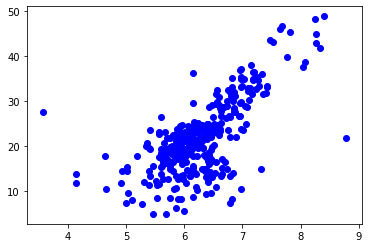

In [107]:
# 1.3 plot 
plt.scatter(X_train, y_train, color = 'b')

In [108]:
# 2 use Simple linear regression 
# first initialize the class 
ln = SimLinear() 
ln.fit(X_train, y_train) 

In [109]:
ln.predict(X_test)

array([22.35515661,  7.28474775, 21.23974806, 20.59528979, 17.08381842,
       22.61954975, 25.42872684, 19.11634067, 20.06650351, 24.39594115,
       21.6198132 , 15.96840987, 20.94230578, 10.26743283, 14.78690304,
       18.59581668, 21.59502634, 22.12381262, 24.68512114, 27.89915023,
       19.19896353, 20.5870275 , 17.7282767 , 20.86794521, 18.62060354,
       24.62728514, 28.99803421, 22.99961489, 20.35568351, 23.28879488,
       19.38073381, 18.90978353, 17.05076928, 22.84263146, 21.88420634,
       11.03582539, 23.08223774, 29.98950848, 15.00998475,  6.03714263,
       19.57076638, 25.52787427, 18.59581668, 22.76827089, 18.17444012,
        1.86468842, 29.00629649, 22.08250119, 23.31358174, 24.767744  ,
       23.7349583 , 27.31252795, 29.4607222 , 21.58676406, 18.56276754,
       26.62675825, 22.12381262, 25.70964455, 33.49271755, 26.26321769,
       14.59687047, 26.71764339, 20.20696237, 14.14244476, 15.02650932,
       17.26558871, 21.3306332 , 18.99240639, 21.19017435, 16.52

In [110]:
ln._b

-30.052520717968378

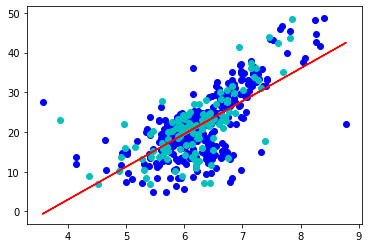

In [111]:
# plot Best fit line 
plt.scatter(X_train, y_train, color = 'b')
plt.scatter(X_test, y_test, color="c")
plt.plot(X_train, ln._a * X_train + ln._b, color = 'r') 

In [112]:
# 3. 獲取predicted value 
pre = ln.predict(X_test) 

In [113]:
# 4. 性能評測 evaluate the model 
x1 = SimLinear.mse(pre, y_test) 
x2 = SimLinear.rmse(pre, y_test)
x3 = SimLinear.mae(pre, y_test) 
print(f'mse:{x1}, rmse:{x2}, mae:{x3}')

mse:33.19186562803331, rmse:5.7612382026812, mae:4.11505108243741


In [114]:
# mean squared error, mean_absolute error using packages 
y1 = mean_squared_error(y_test, pre)
y2 = mean_absolute_error(y_test, pre)
print(f'{y1}, {y2}')

33.19186562803331, 4.11505108243741


In [115]:
#rmse
import math
math.sqrt(y1)

5.7612382026812

In [116]:
# 4.rsquared 
r2 = 1 - y1/np.var(y_test)
r2

0.48097369546663726

In [117]:
# use r2_score from metrics 包
r3 = r2_score(y_test, pre) 
r3

0.48097369546663726

## Multiple Linear Regression 

In [118]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
 
df = datasets.load_boston() 
mdata = df.data 
mdata
mtarget = df.target

In [119]:
# 1. remove unreasonable data 
mdata = mdata[mtarget < 50] 
mtarget = mtarget[mtarget<50]  
print(mdata.shape, mtarget.shape)

(490, 13) (490,)


In [120]:
# 2. split training and test 
X_train, X_test, y_train, y_test = train_test_split(mdata, mtarget, random_state = 666) 
print(X_train.shape, X_test.shape)

(367, 13) (123, 13)


In [121]:
len(X_train)

367

### Note: 
    1. X_train is a 367 by 13 dimension, with no 1 column .367 is observation number 
    2. X_test is a 123 by 13 dim, 123 is observation number. 

In [122]:
class MultiLinearRegression: 
    def __init__(self): 
        '''初始化 沒必要加'''
        self.coef_ = None 
        self.theta_ = None 
        self.interp_ = None 
    
    def fit(self, x_train, y_train):   #x_train 小寫就可以，因為是代表傳進去的parameter
        '''
        function: train the training dataset and their response 
        to get the parameters of the model
        theta 值是從training data pair 訓練得出來的 
        根据训练数据集X_train，y_train 训练Linear Regression模型
        ：param x_train: training dataset 
        : param y_train: training response 
        :return: self
        '''
        # 生成X_b matrix, adding the all-1 column 
        one = np.ones((len(x_train), 1))   # double brackets !!!!  
        x_b = np.hstack([one, x_train])    # horizontal 橫著左右合併, [...] in between  
        # calculate the parameter vector - Theta using (least squared error) formula 
        # np.linalg.inv ()  get inverse 
        
        self.theta_ = (np.linalg.inv((x_b.T).dot(x_b))).dot(x_b.T).dot(y_train)
        print(f'所有theta:{self.theta_}')
        print(type(self.theta_))           # numpy array 
        # self.theta_ is a np.array
        # theta as intercept, before the 1 term
        self.interp_ = self.theta_[0] 
        # theta before explanatory variables 
        self.coe_ = self.theta_[1:]
        return self 
    
    def predict(self, x_test): 
        '''
        function: return predicted value y 
        :param x_test: test value, value to predict 
        :return: predicted value
        '''
        # again add the all-1 column to the xvalue for prediction  
        ones = np.ones((len(x_test), 1))     # double brackets 
        test_b = np.hstack([ones, x_test])
        # return predicted 
        y_pred = test_b.dot(self.theta_)    # order does not matter 
        return y_pred
    
    def score(self, x_test, y_test): 
        ''' 
        function: to test how well our model fits 
        :param x_test: test data 
        :param y_test: true response for test data 
        '''
        y_pred = self.predict(x_test) 
        # r_2 
        mse = (np.sum((y_test - y_pred)**2))/len(y_test)
        # by simplified r_squared formula 
        r_2 = 1 - mse/np.var(y_test) 
        return r_2 


In [123]:
a = np.arange(6).reshape(2,-1)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [124]:
b = np.arange(3).reshape(3,-1)
b

array([[0],
       [1],
       [2]])

In [125]:
a.dot(b)

array([[ 5],
       [14]])

## Sklearn multiple linear regression 

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
X_train, X_test,y_train, y_test = train_test_split(mdata, mtarget,random_state = 6) 

In [128]:
# train 
mg = LinearRegression() 
mg.fit(X_train, y_train) 
print(f'intercept: {mg.intercept_}, explanotory:{mg.coef_}')

intercept: 37.2257043753111, explanotory:[-1.05577445e-01  4.66160820e-02 -1.92280453e-02  8.40970893e-01
 -1.52644876e+01  3.56227986e+00 -2.22848769e-02 -1.39770848e+00
  2.79730722e-01 -1.49871566e-02 -8.96601592e-01  7.16411874e-03
 -3.79648211e-01]


In [129]:
# predict 
pred = mg.predict(X_test)
pred

array([26.72686748, 14.07326692, 15.90517715, 22.16539355,  8.8035371 ,
       30.63582605, 21.71073442, 34.95582661, 24.38783803, 26.03168567,
       19.53666191, 23.94991603, 20.23259517, 32.61760598, 32.35929864,
       28.11544936, 30.41514642, 22.72987574, 20.77637709, 17.14250326,
       15.92390214, 22.08159355, 20.69144803, 14.10429827, 31.66001472,
       12.78082672, 23.04184715, 20.62000224, 28.17683618, 33.99622229,
       19.42226701, 17.35560606, 13.38995036, 14.29075311, 13.08520484,
        7.28055422, 12.7647871 , 28.15104417,  6.97555203, 13.94616867,
       24.8116627 , 29.40529318, 29.18961213, 32.31156361, 36.25799036,
       21.73485901, 21.40114515, 23.2216842 , 23.83014829, 21.3825042 ,
       29.66249918, 27.11422913, 19.19121029, 27.83440825, 24.45531317,
       22.95609204, 27.10134636, 16.11298263, 24.45720552,  6.08787337,
       29.69208924, 20.73374682, 11.33725621, 22.43412335, 18.08126581,
       20.04395947, 34.56823209, 23.43533775, 18.30095549, 34.22

In [130]:
# r squared score 
sc = r2_score(y_test, pred)
print(f'测试R_2得分：{sc}')

测试R_2得分：0.7356551504057156


## KNN regressor 归一化 （Normalization) 

In [131]:
from sklearn.preprocessing import StandardScaler
# create normalized object 
sca = StandardScaler() 
# fit model 
sca.fit(X_train, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [132]:
# now model is already fitted, we normalize the data 
X_train_norm = sca.transform(X_train) 
X_test_norm = sca.transform(X_test)

# why not normalize y? 

In [133]:
# now use a new method: KN regression 
from sklearn.neighbors import KNeighborsRegressor
kng = KNeighborsRegressor() 
kng.fit(X_train_norm, y_train) 
ks = kng.score(X_test_norm, y_test)     
#note: parameters diff from r2_score (y_test, pred)

print(f'KNeighborsRegressor score: {ks}')

KNeighborsRegressor score: 0.8039422319009865


## conclude 
- 已经normalization 
- R square still 0.8, not bigger than before, not better 

## GridSearch 获得KNN 相关最优超参数 
- MLR 中的参数  theta 优化不了
- 只能优化 超参数 

In [134]:
# create GridSearchCV instance 
# 确定 最优化超参数 算法
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "weights": ["uniform"],
        "n_neighbors": [i for i in range(1, 11)]
    },
    {
        "weights": ["distance"],
        "n_neighbors": [i for i in range(1, 11)],
        "p": [i for i in range(1,6)]
    }
]


from sklearn.linear_model import LinearRegression

# only apply to KNeighborsRegressor case 会有超参数 
xt = KNeighborsRegressor()     # use package from sklearn
gs = GridSearchCV(xt, param_grid,
                  n_jobs = -1, 
                  verbose = 1) 

In [135]:
# train gridsearch model 
# X_train is the normalized training set 
gs.fit(X_train_norm, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [136]:
# after training, we get the best optimized 超参数 parameter 
print (f'最优超参数: {gs.best_params_}')

最优超参数: {'n_neighbors': 3, 'p': 3, 'weights': 'distance'}


In [137]:
# 得到最优超参数 的linear regression model 
best_lr = gs.best_estimator_ 

In [138]:
# now get score 
sc = best_lr.score(X_test_norm, y_test)
print(f'最优化超参数KNeighborsRegressors 算法score:{sc}') 

最优化超参数KNeighborsRegressors 算法score:0.8089047666775495


## 线性回归参数的可解释性

In [139]:
# mg 是 sklearn 的 linear regression 训练结果
mg.coef_

array([-1.05577445e-01,  4.66160820e-02, -1.92280453e-02,  8.40970893e-01,
       -1.52644876e+01,  3.56227986e+00, -2.22848769e-02, -1.39770848e+00,
        2.79730722e-01, -1.49871566e-02, -8.96601592e-01,  7.16411874e-03,
       -3.79648211e-01])

In [140]:
# 对特征参数进行索引排序 
si = np.argsort(mg.coef_)
si

array([ 4,  7, 10, 12,  0,  6,  2,  9, 11,  1,  8,  3,  5])

In [141]:
# df is boston data 
df.feature_names[np.argsort(mg.coef_)]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'AGE', 'INDUS', 'TAX',
       'B', 'ZN', 'RAD', 'CHAS', 'RM'], dtype='<U7')

In [142]:
# print (df.DESCR)